Importowanie bibliotek

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Ładowanie zestawu danych

In [2]:
crus = pd.read_csv('VLagun_Crus_Basins.csv')
rotif = pd.read_csv('VLagun_Rotif_Basins.csv')

1. Eksploracja danych strukturalnych

In [3]:
crus.head()

,Bosmina longirostris,Ceriodaphnia sp.,Diaphanosoma brachyurum,Leptodora kindtii,Acartia longiremis,Acartia tonsa,Eurytemora affinis,Cyclops sp.,Nauplii Cyclopoida,Nauplii Calanoida,Thermocyclops oithonoides,Eurytemora lacustris,Basin
0,0.0,0.0,0.0,0.0,2.0710,0.9298,0.9251,0.0000,0.0025,0.0257,0.0000,0.0,0
1,0.0,0.0,0.0,0.0,0.5014,0.0378,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0
2,0.0,0.0,0.0,0.0,0.0931,0.0000,0.0000,0.0093,0.0138,0.0006,0.0091,0.0,0
3,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0129,0.0060,0.0140,0.0155,0.0179,0.0,0
4,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0141,0.0000,0.0093,0.0007,0.0166,0.0,0


In [4]:
rotif.head()

,Anureopsis fissa,Ascomorpha saltans,Asplanchna priodonta,Brachionus angularis,Brachionus calyciflorus calyciflorus,Brachionus calyciflorus f.amphiceros,Brachionus calyciflorus spinosus,Brachionus urceolaris,Brachionus calyciflorus f.anureiformis,Filinia longiseta,Keratella cochlearis cochlearis,Keratella cochlearis f.tecta,Keratella quadrata,Polyarthra vulgaris,Polyarthra platyptera,Pompholyx sp.,Synchaeta sp.,Trichocerca pusilla,Trichocerca similis,Basin
0,0.0000,0.0068,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,1.3152,0.8920,0.2714,0.0000,0.0313,0.0,0.0000,0.0000,0.0045,0.0009,0
1,0.0003,0.0000,0.0556,0.0000,0.0179,0.0,0.0,0.0,0.0,0.0769,0.0640,0.0464,0.0000,0.0111,0.0,0.0000,0.0437,0.0041,0.0020,0
2,0.0001,0.0000,0.0014,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0466,0.0120,0.0044,0.0000,0.0000,0.0,0.0001,0.0000,0.0000,0.0000,0
3,0.0001,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0313,0.0079,0.0040,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0
4,0.0001,0.0000,0.0000,0.0003,0.0000,0.0,0.0,0.0,0.0,0.0491,0.0143,0.0019,0.0026,0.0000,0.0,0.0001,0.0000,0.0000,0.0000,0


2. Wywalenie pustych wartości

In [5]:
crus.dropna()

,Bosmina longirostris,Ceriodaphnia sp.,Diaphanosoma brachyurum,Leptodora kindtii,Acartia longiremis,Acartia tonsa,Eurytemora affinis,Cyclops sp.,Nauplii Cyclopoida,Nauplii Calanoida,Thermocyclops oithonoides,Eurytemora lacustris,Basin
0,0.0000,0.0,0.0000,0.0000,2.0710,0.9298,0.9251,0.0000,0.0025,0.0257,0.0000,0.0,0
1,0.0000,0.0,0.0000,0.0000,0.5014,0.0378,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0
2,0.0000,0.0,0.0000,0.0000,0.0931,0.0000,0.0000,0.0093,0.0138,0.0006,0.0091,0.0,0
3,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0129,0.0060,0.0140,0.0155,0.0179,0.0,0
4,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0141,0.0000,0.0093,0.0007,0.0166,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0.0734,0.0,0.0476,0.0000,0.5052,0.0000,2.6966,0.0000,0.0094,0.0831,0.0000,0.0,1
151,0.1653,0.0,0.0000,0.0000,0.1243,0.0000,0.0000,0.8835,0.0512,0.0000,0.0000,0.0,1
152,0.0256,0.0,0.0000,0.0009,0.0584,0.0000,0.0000,0.5989,0.0549,0.0000,0.0000,0.0,1
153,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0170,0.0187,0.0000,0.0014,0.0000,0.0,1


In [6]:
rotif.dropna()

,Anureopsis fissa,Ascomorpha saltans,Asplanchna priodonta,Brachionus angularis,Brachionus calyciflorus calyciflorus,Brachionus calyciflorus f.amphiceros,Brachionus calyciflorus spinosus,Brachionus urceolaris,Brachionus calyciflorus f.anureiformis,Filinia longiseta,Keratella cochlearis cochlearis,Keratella cochlearis f.tecta,Keratella quadrata,Polyarthra vulgaris,Polyarthra platyptera,Pompholyx sp.,Synchaeta sp.,Trichocerca pusilla,Trichocerca similis,Basin
0,0.0000,0.0068,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0000,1.3152,0.8920,0.2714,0.0000,0.0313,0.0000,0.0000,0.0000,0.0045,0.0009,0
1,0.0003,0.0000,0.0556,0.0000,0.0179,0.0000,0.0,0.0,0.0000,0.0769,0.0640,0.0464,0.0000,0.0111,0.0000,0.0000,0.0437,0.0041,0.0020,0
2,0.0001,0.0000,0.0014,0.0000,0.0000,0.0000,0.0,0.0,0.0000,0.0466,0.0120,0.0044,0.0000,0.0000,0.0000,0.0001,0.0000,0.0000,0.0000,0
3,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0000,0.0313,0.0079,0.0040,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
4,0.0001,0.0000,0.0000,0.0003,0.0000,0.0000,0.0,0.0,0.0000,0.0491,0.0143,0.0019,0.0026,0.0000,0.0000,0.0001,0.0000,0.0000,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0.0002,0.0000,0.0530,0.0576,0.0000,0.0329,0.0,0.0,0.0000,0.1651,0.1410,0.0010,0.0049,0.0000,0.0007,0.0060,0.0045,0.0003,0.0010,1
151,0.0000,0.0000,0.1325,0.1083,0.0306,0.2261,0.0,0.0,0.0388,0.0550,0.0569,0.0016,0.0066,0.0000,0.0000,0.0033,0.0241,0.0002,0.0001,1
152,0.0001,0.0000,0.0833,0.0809,0.0038,0.1058,0.0,0.0,0.0324,0.2819,0.0941,0.0016,0.0242,0.0000,0.0000,0.0067,0.0318,0.0004,0.0009,1
153,0.0000,0.0000,0.0007,0.0031,0.0127,0.0000,0.0,0.0,0.0000,0.0127,0.0188,0.0033,0.0018,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1


3. Wybieranie funkcji, przygotowanie X i Y

Y - zmienna zależna (docelowa)
X - zmienne niezależne (cechy (features))

In [7]:
X_crus = pd.get_dummies(crus)
X_rotif = pd.get_dummies(rotif)
X_crus.drop(['Basin'], inplace=True, axis=1)
X_rotif.drop(['Basin'], inplace=True, axis=1)
Y_crus = crus['Basin']
Y_rotif = rotif['Basin']

4. Dzielenie danych na zestaw treningowy i testowy

In [8]:
X_crus = X_crus.iloc[:,0:12]
X_rotif = X_rotif.iloc[:,0:19]
Y_crus = Y_crus.iloc[:,]
Y_rotif = Y_rotif.iloc[:,]
test_size = 0.25
X_crus_train, X_crus_test, Y_crus_train, Y_crus_test = train_test_split(X_crus, Y_crus, test_size=test_size, random_state=16)
X_rotif_train, X_rotif_test, Y_rotif_train, Y_rotif_test = train_test_split(X_rotif, Y_rotif, test_size=test_size, random_state=16)
print('Shape of X_crus_train:', X_crus_train.shape)
print('Shape of X_crus_test:', X_crus_test.shape)
print('Shape of X_rotif_train:', X_rotif_train.shape)
print('Shape of X_rotif_test:', X_rotif_test.shape)

Shape of X_crus_train: (116, 12)
Shape of X_crus_test: (39, 12)
Shape of X_rotif_train: (116, 19)
Shape of X_rotif_test: (39, 19)


5. Rozwinięcie modelu i przewidywanie

Najpierw należy zaimportować moduł Regresji logistycznej i utworzyć obiekt klasyfikatora regresji logistycznej za pomocą funkcji LogisticRegression() z random_state dla odtwarzalności.

Następnie dopasujemy model do zestawu uczącego za pomocą funkcji fit() i wykonamy predykcję na zestawie testowym za pomocą metody predict().

In [9]:
logreg_crus = LogisticRegression(random_state=16)
logreg_rotif = LogisticRegression(random_state=16)
logreg_crus.fit(X_crus_train, Y_crus_train)
logreg_rotif.fit(X_rotif_train, Y_rotif_train)
Y_crus_pred = logreg_crus.predict(X_crus_test)
Y_rotif_pred = logreg_rotif.predict(X_rotif_test)

6. Ocena modelu przy użyciu macierzy pomyłek - Confusion Matrix

Macierz pomyłek to tabela używana do oceny wydajności modelu klasyfikacji. Można również wizualizować wydajność algorytmu. Podstawą macierzy pomyłek jest liczba poprawnych i niepoprawnych przewidywań zsumowanych w klasach.

Tutaj możesz zobaczyć macierz pomyłek w postaci obiektu tablicy. Wymiar tej macierzy wynosi 2*2, ponieważ ten model jest klasyfikacją binarną. Masz dwie klasy 0 i 1. Wartości przekątnych reprezentują dokładne przewidywania, podczas gdy elementy inne niż ukośne są niedokładnymi przewidywaniami. W danych wyjściowych 23 i 6 to prawdziwe przewidywania, a 10 i 0 to fałszywe przewidywania.

In [10]:
cnf_crus_matrix = metrics.confusion_matrix(Y_crus_test, Y_crus_pred)
cnf_crus_matrix

array([[23,  0],
       [10,  6]], dtype=int64)

In [11]:
cnf_rotif_matrix = metrics.confusion_matrix(Y_rotif_test, Y_rotif_pred)
cnf_rotif_matrix

array([[20,  3],
       [15,  1]], dtype=int64)

7. Wizualizacja macierzy pomyłek przy użyciu mapy cieplnej

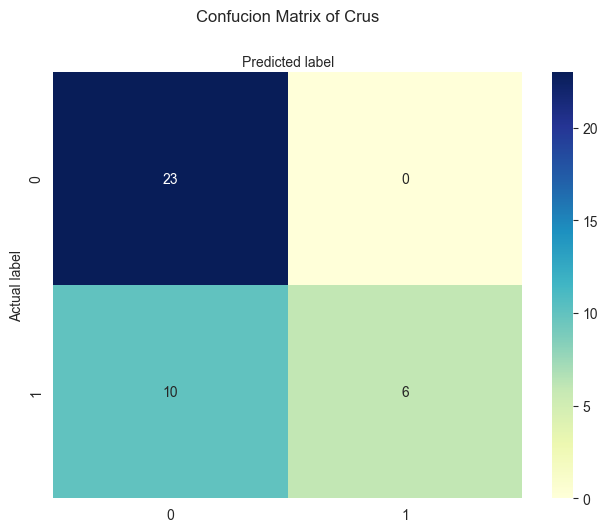

In [12]:
class_names = [0, 1]
fix, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_crus_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confucion Matrix of Crus', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

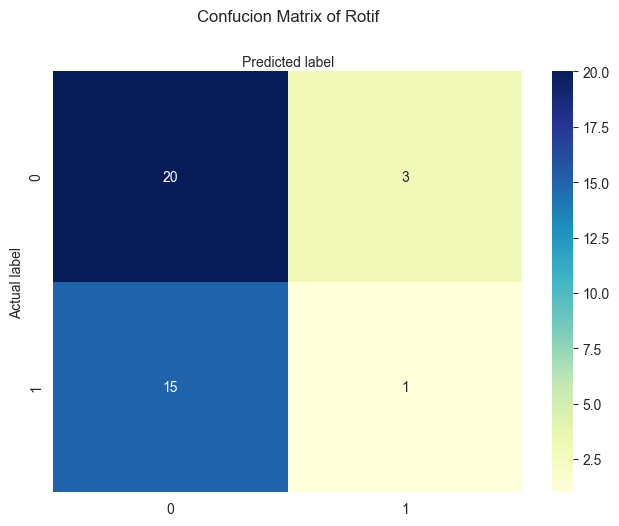

In [13]:
fix, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_rotif_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confucion Matrix of Rotif', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

8. Miary oceny Confusion Matrix

In [14]:
target_names = ['Influence of sea waters', 'Influence of land waters']
print(f"{'Crus':=^65}")
print(metrics.classification_report(Y_crus_test, Y_crus_pred, target_names=target_names))

==============================Crus===============================
                          precision    recall  f1-score   support

 Influence of sea waters       0.70      1.00      0.82        23
Influence of land waters       1.00      0.38      0.55        16

                accuracy                           0.74        39
               macro avg       0.85      0.69      0.68        39
            weighted avg       0.82      0.74      0.71        39


In [15]:
print(f"{'Rotif':=^65}")
print(metrics.classification_report(Y_rotif_test, Y_rotif_pred, target_names=target_names))

==============================Rotif==============================
                          precision    recall  f1-score   support

 Influence of sea waters       0.57      0.87      0.69        23
Influence of land waters       0.25      0.06      0.10        16

                accuracy                           0.54        39
               macro avg       0.41      0.47      0.39        39
            weighted avg       0.44      0.54      0.45        39


9. Krzywa ROC

Receiver Operating Characteristic (ROC). Krzywa jest wykresem prawdziwie dodatnich przewidywań w stosunku do fałszywie dodatnich. Pokazuje kompromis między czułością a swoistością (sensitivity i specificity).

AUC (Area Under Curve) Wynik dla naszego przypadku wynosi 0,73. Wynik AUC = 1 reprezentuje klasyfikator doskonały, a 0,5 oznacza klasyfikator bezwartościowy.

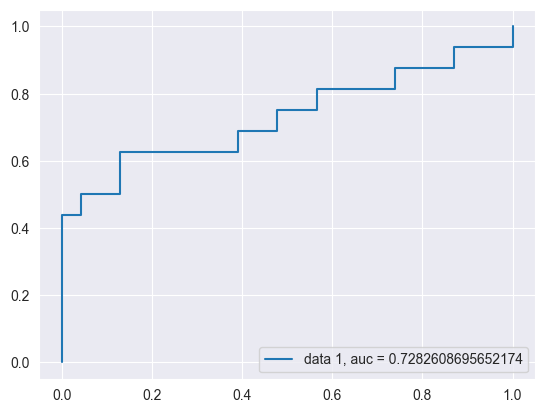

In [16]:
Y_crus_pred_proba = logreg_crus.predict_proba(X_crus_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_crus_test, Y_crus_pred_proba)
auc = metrics.roc_auc_score(Y_crus_test, Y_crus_pred_proba)
plt.plot(fpr, tpr, label='data 1, auc = ' + str(auc))
plt.legend(loc=4)
plt.show()

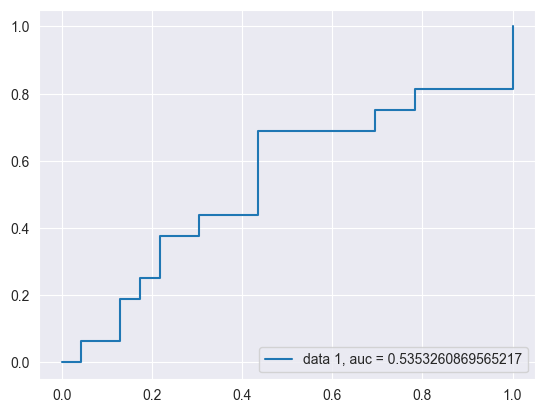

In [17]:
Y_rotif_pred_proba = logreg_rotif.predict_proba(X_rotif_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_rotif_test, Y_rotif_pred_proba)
auc = metrics.roc_auc_score(Y_rotif_test, Y_rotif_pred_proba)
plt.plot(fpr, tpr, label='data 1, auc = ' + str(auc))
plt.legend(loc=4)
plt.show()

Skorupiaki większe (Crus) zależą bardziej od wód lądowych, a mniejsze (Rotif) od wód morskich.